In [1]:
%matplotlib inline
import numpy as np
import yaml
from math import log10
#import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pymongo import MongoClient
from bson.objectid import ObjectId
#client = MongoClient('mongodb://server.mcgarity.info:27017')
client = MongoClient()  # use local database by default
db = client["borg_wingo_wise"]
collectionNames = sorted(db.collection_names())
collectionNames

[u'y16m02d15_1000_1',
 u'y16m02d15_200_1',
 u'y16m02d15_4000_1',
 u'y16m02d15_debugging',
 u'y16m02d16_12000',
 u'y16m02d16_4000_lower_range']

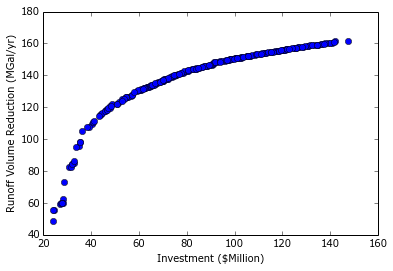

In [4]:
runs = db['y16m02d16_12000']
cursor = runs.find()
ndocs = runs.count()
last = cursor.count()-1  # Pareto solution is in the last record
paretoDict = cursor[last]  # get the Pareto Solution
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
totCostList1 = []
volReductionList1 = []
greenedAcreList1 = []
numParetoPoints1 = len(paretoDict)
for i in range(1,numParetoPoints1):
    key = str(i)   # must store mongoDB keys as strings !!
    paretoPointList = paretoDict[key]
    solutionList = paretoPointList[0]
    objList = paretoPointList[1]
    #print objList
    greenedAcreList1.append(solutionList)
    totCostList1.append(objList[0]/1e6)
    volReductionList1.append(-objList[1]) # restore to maximization
#print volReductionList
'''
runs = db['y16m02d16_4000_lower_range']
cursor = runs.find()
ndocs = runs.count()
last = cursor.count()-1  # Pareto solution is in the last record
paretoDict = cursor[last]  # get the Pareto Solution

totCostList2 = []
volReductionList2 = []
greenedAcreList2 = []
numParetoPoints2 = len(paretoDict)
for i in range(1,numParetoPoints2):
    key = str(i)   # must store mongoDB keys as strings !!
    paretoPointList = paretoDict[key]
    solutionList = paretoPointList[0]
    objList = paretoPointList[1]
    #print objList
    greenedAcreList2.append(solutionList)
    totCostList2.append(objList[0]/1e6)
    volReductionList2.append(-objList[1]) # restore to maximization
'''

plt.plot(totCostList1,volReductionList1, 'o')
#plt.plot(totCostList2,volReductionList2, '^')
plt.xlabel('Investment ($Million)')
plt.ylabel('Runoff Volume Reduction (MGal/yr)')
plt.show()

In [6]:
f = open('wingohocking.yaml','r')
doc = yaml.load(f)
I = doc['I']
J = doc['J']
K = doc['K']
a = doc['a']
b = doc['b']
g = doc['g']
# Calculate Cost Coefficients
cost = {}
for j in sorted(J):
    for k in sorted(K):
        costCoeff = 10**(a[j] - b[j]*log10(g[k]))
        cost[(j,k)] = costCoeff
allSolnGreenedAcresList = []   # a list of dictionaries
allSolnCostList = []           # a list of dictionaries
for h in range(0,numParetoPoints1-1):
    variables = greenedAcreList1[h]
    varNum = 0
    varDict = {}
    costDict = {}
    for i in sorted(I):
        for j in sorted(J):
            for k in sorted(K):
                greenedAcres = variables[varNum]
                varDict[(i,j,k)] = greenedAcres  # load variable values into varDict
                costDict[(i,j,k)] = cost[(j,k)]*greenedAcres
                varNum += 1
    allSolnGreenedAcresList.append(varDict)
    allSolnCostList.append(costDict)

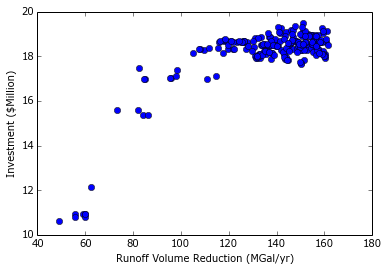

In [31]:
subcatCostDict = {}
for i in sorted(I):
    #print i
    subcatCostDict[i] = []

for h in range(0,numParetoPoints1-1):
    costDict = allSolnCostList[h]
    for i in sorted(I):
        subcatCost = 0.0
        for j in sorted(J):
            for k in sorted(K):
                subcatCost += costDict[i,j,k]
        subcatCostDict[i].append(subcatCost/1.0e6)  # convert to $Million

#print subcatCostDict['S7']           

S1 = subcatCostDict['S1']
plt.plot(volReductionList1, S1, 'o')
plt.ylabel('Investment ($Million)')
plt.xlabel('Runoff Volume Reduction (MGal/yr)')
plt.show()


In [ ]:
result = db.y16m02d15_4000_1.delete_one({'_id': ObjectId('56c343611a5e830c9025b41d') })
result

In [ ]:
runs = db['y16m02d15_4000_1']
cursor = runs.find()
ndocs = runs.count()
last = cursor.count()-1  # Pareto solution is in the last record
paretoDict = cursor[last]  # get the Pareto Solution
#runNum = 1
#runDict = cursor[runNum]
#runDict
paretoDict
#extraDoc = cursor[last]
#result = db.y16m02d15_4000_1.delete_one({'_id': ObjectId('56c343831a5e830c9025b422') })
#result
#extraDoc